In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm_diabetic_patient.pkl')
data = data.transpose()
data.head()

,Sarah,annabel,catherine,charlie,chloe,emma,fatima,helen,jay,jon,...,kev,linda,lynn,pat,pauline,reena,sandra,sarah,sasha,steph
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
achieve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
active,1,0,1,1,0,0,0,1,1,2,...,0,0,1,0,0,0,0,1,1,0
activity,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Sarah': [('diabetes', 12),
  ('uk', 6),
  ('later', 6),
  ('story', 4),
  ('opens', 4),
  ('window', 4),
  ('new', 4),
  ('page', 3),
  ('coronavirus', 2),
  ('close', 2),
  ('saved', 2),
  ('meclose', 2),
  ('savefor', 2),
  ('type', 2),
  ('life', 1),
  ('biggest', 1),
  ('instagram', 1),
  ('twitter', 1),
  ('intervention', 1),
  ('youtube', 1),
  ('search', 1),
  ('help', 1),
  ('diet', 1),
  ('remission', 1),
  ('joseph', 1),
  ('changed', 1),
  ('putting', 1),
  ('snitas', 1),
  ('httpswwwdiabetesorguk', 1),
  ('jezs', 1)],
 'annabel': [('diabetes', 10),
  ('later', 6),
  ('uk', 5),
  ('opens', 4),
  ('window', 4),
  ('new', 4),
  ('story', 3),
  ('page', 3),
  ('saved', 2),
  ('meclose', 2),
  ('savefor', 2),
  ('lynns', 2),
  ('close', 2),
  ('getting', 1),
  ('share', 1),
  ('way', 1),
  ('support', 1),
  ('search', 1),
  ('journey', 1),
  ('serial', 1),
  ('matthews', 1),
  ('setter', 1),
  ('help', 1),
  ('shares', 1),
  ('plunge', 1),
  ('sharons', 1),
  ('step', 1),
  ('

In [3]:
# Print the top 15 words said by each patient
for patient_names, top1 in top_dict.items():
    print(patient_names)
    print(', '.join([wording for wording, count in top1[0:14]]))
    print('---')

Sarah
diabetes, uk, later, story, opens, window, new, page, coronavirus, close, saved, meclose, savefor, type
---
annabel
diabetes, later, uk, opens, window, new, story, page, saved, meclose, savefor, lynns, close, getting
---
catherine
diabetes, later, uk, new, opens, story, window, page, savefor, kevs, help, close, meclose, saved
---
charlie
diabetes, later, uk, story, window, new, opens, page, coronavirus, type, saved, savefor, meclose, weight
---
chloe
diabetes, molly, family, paul, running, uk, run, support, diagnosed, type, dawn, friends, little, sister
---
emma
diabetes, new, type, later, years, martin, uk, opens, window, story, im, coronavirus, managing, page
---
fatima
youre, diabetes, ill, later, quite, just, bad, diagnosed, uk, peers, new, shocking, insulin, window
---
helen
diabetes, later, uk, window, story, opens, new, page, close, support, meclose, managing, savefor, saved
---
jay
diabetes, later, uk, window, opens, new, story, page, savefor, eating, close, saved, meclos

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for patient_names in data.columns:
    top = [word for (word, count) in top_dict[patient_names]]
    for t in top:
        words.append(t)
        
words

['diabetes',
 'uk',
 'later',
 'story',
 'opens',
 'window',
 'new',
 'page',
 'coronavirus',
 'close',
 'saved',
 'meclose',
 'savefor',
 'type',
 'life',
 'biggest',
 'instagram',
 'twitter',
 'intervention',
 'youtube',
 'search',
 'help',
 'diet',
 'remission',
 'joseph',
 'changed',
 'putting',
 'snitas',
 'httpswwwdiabetesorguk',
 'jezs',
 'diabetes',
 'later',
 'uk',
 'opens',
 'window',
 'new',
 'story',
 'page',
 'saved',
 'meclose',
 'savefor',
 'lynns',
 'close',
 'getting',
 'share',
 'way',
 'support',
 'search',
 'journey',
 'serial',
 'matthews',
 'setter',
 'help',
 'shares',
 'plunge',
 'sharons',
 'step',
 'httpswwwdiabetesorguk',
 'twitter',
 'instagram',
 'diabetes',
 'later',
 'uk',
 'new',
 'opens',
 'story',
 'window',
 'page',
 'savefor',
 'kevs',
 'help',
 'close',
 'meclose',
 'saved',
 'experience',
 'immunotherapy',
 'encourage',
 'helping',
 'taking',
 'newly',
 'experiences',
 'httpswwwdiabetesorguk',
 'tips',
 'nutrition',
 'trial',
 'instagram',
 'twitte

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('diabetes', 22),
 ('uk', 22),
 ('later', 20),
 ('opens', 18),
 ('window', 18),
 ('new', 18),
 ('story', 17),
 ('page', 17),
 ('close', 16),
 ('saved', 16),
 ('meclose', 16),
 ('savefor', 16),
 ('instagram', 15),
 ('twitter', 15),
 ('type', 13),
 ('httpswwwdiabetesorguk', 13),
 ('share', 10),
 ('search', 9),
 ('help', 9),
 ('support', 9),
 ('coronavirus', 8),
 ('shares', 8),
 ('experiences', 6),
 ('diagnosed', 6),
 ('insulin', 6),
 ('managing', 6),
 ('diet', 5),
 ('life', 4),
 ('putting', 4),
 ('getting', 4),
 ('going', 4),
 ('things', 4),
 ('biggest', 3),
 ('youtube', 3),
 ('remission', 3),
 ('changed', 3),
 ('snitas', 3),
 ('way', 3),
 ('mental', 3),
 ('im', 3),
 ('just', 3),
 ('years', 3),
 ('challenges', 3),
 ('blood', 3),
 ('helped', 3),
 ('need', 3),
 ('diagnosis', 3),
 ('people', 3),
 ('time', 3),
 ('real', 3),
 ('forum', 3),
 ('intervention', 2),
 ('joseph', 2),
 ('jezs', 2),
 ('journey', 2),
 ('serial', 2),
 ('setter', 2),
 ('plunge', 2),
 ('sharons', 2),
 ('experience', 2),


In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['diabetes',
 'uk',
 'later',
 'opens',
 'window',
 'new',
 'story',
 'page',
 'close',
 'saved',
 'meclose',
 'savefor',
 'instagram',
 'twitter',
 'type',
 'httpswwwdiabetesorguk',
 'share',
 'search',
 'help',
 'support',
 'coronavirus',
 'shares']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_diabetic_patient.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_diabetic_paitent_stop.pkl", "wb"))
data_stop.to_pickle("dtm_diabetic_patient_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

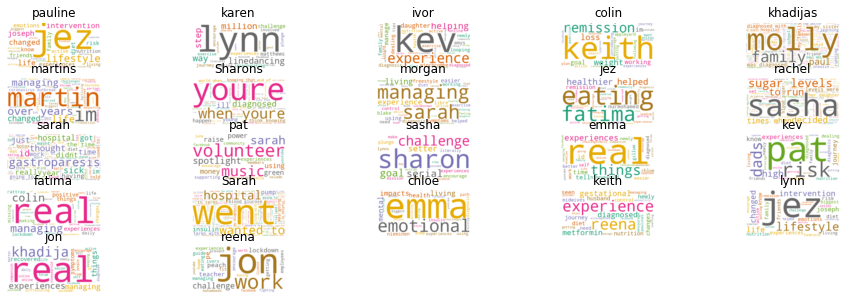

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['pauline', 'karen','ivor','colin','khadijas','martins','Sharons','morgan','jez','rachel','sarah','pat','sasha','emma','kev','fatima','Sarah','chloe','keith','lynn','jon','reena',
'catherine','jay','helen','linda','charlie','annabel','steph','sandra']

# Create subplots for each patient
for index, patient_names in enumerate(data.columns):
    wc.generate(data_clean.transcript[patient_names])
    
    plt.subplot(6, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [10]:
# Find the number of unique words that each partient_names uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for patient_names in data.columns:
    uniques = data[patient_names].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['patient_names', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,patient_names,unique_words
12,sasha,40
11,pat,41
17,chloe,45
1,karen,46
21,reena,49
3,colin,49
18,keith,50
14,kev,52
19,lynn,53
20,jon,53


In [17]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('diabetes', 22),
 ('uk', 22),
 ('later', 20),
 ('opens', 18),
 ('window', 18),
 ('new', 18),
 ('story', 17),
 ('page', 17),
 ('close', 16),
 ('saved', 16),
 ('meclose', 16),
 ('savefor', 16),
 ('instagram', 15),
 ('twitter', 15),
 ('type', 13),
 ('httpswwwdiabetesorguk', 13),
 ('share', 10),
 ('search', 9),
 ('help', 9),
 ('support', 9),
 ('coronavirus', 8),
 ('shares', 8),
 ('experiences', 6),
 ('diagnosed', 6),
 ('insulin', 6),
 ('managing', 6),
 ('diet', 5),
 ('life', 4),
 ('putting', 4),
 ('getting', 4),
 ('going', 4),
 ('things', 4),
 ('biggest', 3),
 ('youtube', 3),
 ('remission', 3),
 ('changed', 3),
 ('snitas', 3),
 ('way', 3),
 ('mental', 3),
 ('im', 3),
 ('just', 3),
 ('years', 3),
 ('challenges', 3),
 ('blood', 3),
 ('helped', 3),
 ('need', 3),
 ('diagnosis', 3),
 ('people', 3),
 ('time', 3),
 ('real', 3),
 ('forum', 3),
 ('intervention', 2),
 ('joseph', 2),
 ('jezs', 2),
 ('journey', 2),
 ('serial', 2),
 ('setter', 2),
 ('plunge', 2),
 ('sharons', 2),
 ('experience', 2),


In [18]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['healthy', 'young', 'food']]
data_profanity = pd.concat([data_bad_words.healthy + data_bad_words.young, data_bad_words.food], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
Sarah,0,0
annabel,0,0
catherine,0,0
charlie,0,0
chloe,3,0
emma,0,0
fatima,8,0
helen,0,1
jay,0,1
jon,0,0


In [19]:
data.transpose()

,able,accept,achieve,active,activity,actually,adjusted,adjusting,admin,administer,...,wrong,wrote,year,years,young,younger,youre,youtube,youve,zenas
Sarah,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
annabel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
catherine,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
charlie,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
chloe,0,0,0,0,6,0,3,0,0,3,...,0,0,0,6,3,0,0,1,0,0
emma,0,0,0,0,0,0,0,2,0,0,...,0,0,0,6,0,0,0,1,0,0
fatima,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,4,0,16,1,0,0
helen,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
jay,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
jon,0,0,0,2,0,0,0,0,0,0,...,2,0,3,0,0,0,0,1,0,0


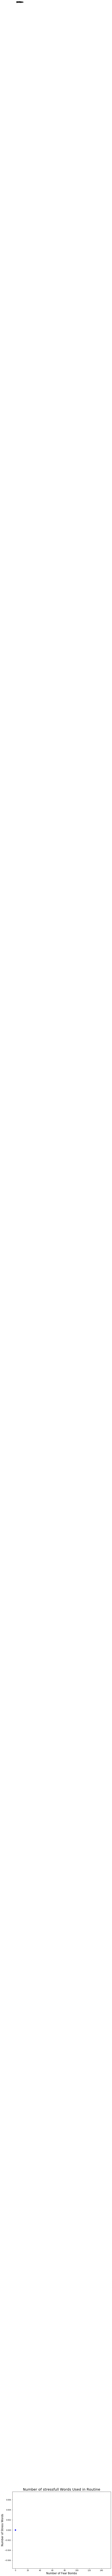

In [21]:

# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[patient_names]
    y = data_profanity.s_word.loc[patient_names]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of stressfull Words Used in Routine', fontsize=20)
plt.xlabel('Number of Fear Bombs', fontsize=15)
plt.ylabel('Number of Stress Words', fontsize=15)

plt.show()